In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
df = pd.read_csv("spam.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
df['Category'] = encoder.fit_transform(df['Category'])

In [8]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Spam = 1  and  Ham = 0 

In [9]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [10]:
df.duplicated().sum()

415

In [11]:
df = df.drop_duplicates(keep = "first")

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5157, 2)

In [14]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

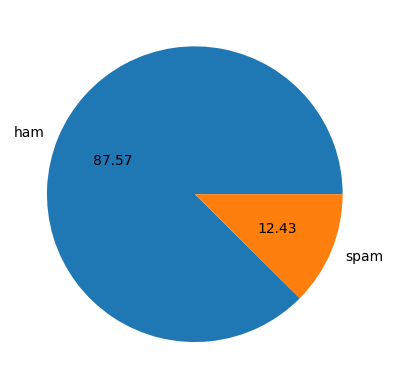

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data Preprocessing 

In [16]:

def transform_text(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)
    
    y = []
    for i in Message:
        if i.isalnum():
            y.append(i)
    
    Message = y[:]
    y.clear()
    
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Message = y[:]
    y.clear()
    
    for i in Message:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [17]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

transform_text('Go until jurong point, crazy.. Available only')

'go jurong point crazi avail'

In [18]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [19]:
df.head()

,Category,Message,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [20]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [21]:
spam_wc = wc.generate(df[df['Category'] == 1]['transformed_text'].str.cat(sep=" "))

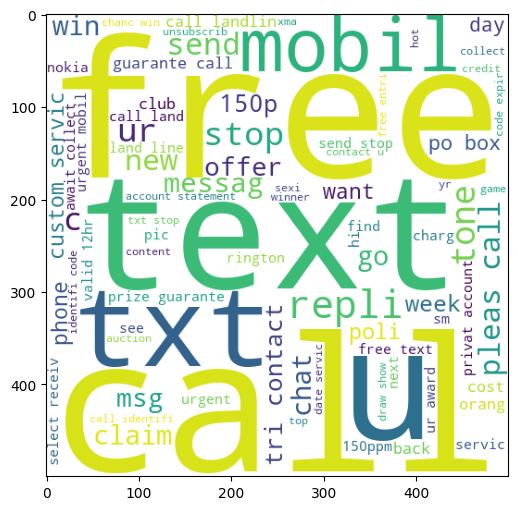

In [22]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [23]:
ham_wc = wc.generate(df[df['Category'] == 0]['transformed_text'].str.cat(sep=" "))

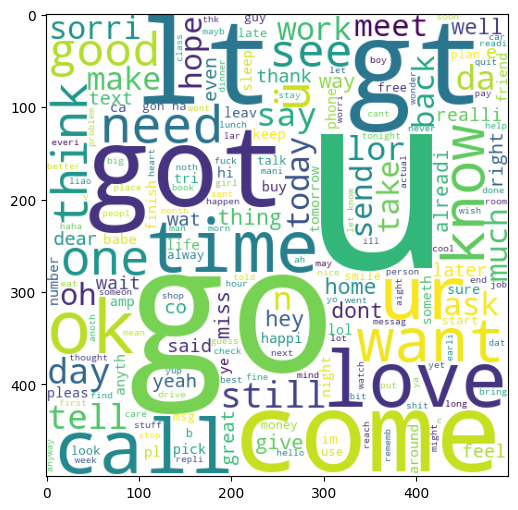

In [24]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

Model Building

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [26]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [27]:
x.shape

(5157, 3000)

In [28]:
y = df['Category'].values

In [29]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [31]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
knc = KNeighborsClassifier(n_neighbors=50)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2,algorithm="SAMME")

In [32]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [33]:
train_classifier(knc,x_train,y_train,x_test,y_test)

(0.8798449612403101, 1.0)

In [34]:
train_classifier(lrc,x_train,y_train,x_test,y_test)

(0.9515503875968992, 0.8909090909090909)

In [35]:
train_classifier(rfc,x_train,y_train,x_test,y_test)

(0.9777131782945736, 0.9829059829059829)

In [36]:
train_classifier(abc,x_train,y_train,x_test,y_test)

(0.9205426356589147, 0.7755102040816326)

In [37]:
import pickle

In [38]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(lrc,open('logistic_model.pkl','wb'))
pickle.dump(knc,open('KNN_model.pkl','wb'))
pickle.dump(rfc,open('RandomForest_model.pkl','wb'))
pickle.dump(abc,open('AdaBoost_model.pkl','wb'))
#lrc = LogisticRegression(solver='liblinear', penalty='l1')
#knc = KNeighborsClassifier()
#rfc = RandomForestClassifier(n_estimators=50, random_state=2)
#abc = AdaBoostClassifier(n_estimators=50, random_state=2)